In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Input, Activation, GRU, Dense
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import scale, StandardScaler, RobustScaler
from collections import OrderedDict, defaultdict, Counter
plt.rcParams['figure.figsize'] = [10, 8]

/home/tavish/miniconda3/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [18]:
df = pd.read_csv('wikipedia/web-traffic-time-series-forecasting/train_2.csv', usecols = [0])
df.shape

(145063, 1)

In [19]:
df = pd.read_csv('wikipedia/web-traffic-time-series-forecasting/train_2.csv', nrows=1)
df.shape

(1, 804)

In [20]:
# read requests for 145k articles on day 1
df = pd.read_csv('wikipedia/web-traffic-time-series-forecasting/train_2.csv', usecols = [1])
df.fillna(0, inplace=True) # fill missing vals with 0
df.sort_values(by=[df.columns[0]], ascending=False, inplace=True)
df.head()

,2015-07-01
38573,20381245.0
9774,11952559.0
74114,8039732.0
139119,2983623.0
116196,2038711.0


In [21]:
# total requests on day 1
df.sum()

2015-07-01    148672476.0
dtype: float64

In [22]:
weights = (df[df.columns[0]]/sum(df[df.columns[0]])).values
weights

array([0.13708822, 0.08039524, 0.0540768 , ..., 0.        , 0.        ,
       0.        ])

In [ ]:
counter = Counter()
for j in range(500000):
    c = np.random.choice(df.index, 1, p=weights)[0]
    counter[c] += 1

In [66]:
counter.most_common(50)

[(38573, 68507),
 (9774, 40149),
 (74114, 27141),
 (139119, 9985),
 (116196, 6955),
 (39180, 6915),
 (92205, 5955),
 (27330, 5560),
 (10403, 5392),
 (99322, 5006),
 (95855, 4543),
 (55104, 4195),
 (67049, 2785),
 (103123, 2486),
 (17670, 2236),
 (140151, 1506),
 (66736, 1420),
 (120336, 1380),
 (74690, 1304),
 (71199, 1119),
 (7344, 1016),
 (90810, 966),
 (86431, 938),
 (69939, 918),
 (10761, 840),
 (28727, 743),
 (103349, 630),
 (99537, 628),
 (40689, 626),
 (10399, 586),
 (104195, 576),
 (12662, 567),
 (39172, 567),
 (100414, 527),
 (27825, 519),
 (41990, 516),
 (8221, 487),
 (123025, 464),
 (61350, 438),
 (89202, 426),
 (40124, 396),
 (57309, 370),
 (45071, 368),
 (97793, 361),
 (38144, 354),
 (40248, 341),
 (81665, 338),
 (101602, 333),
 (38258, 332),
 (37701, 330)]

[3028.] [25584989.]


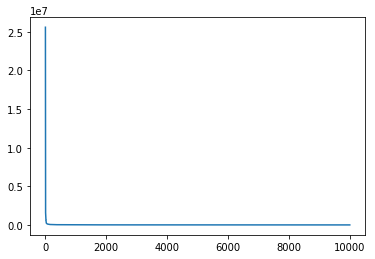

In [24]:
# request frequency distributions for all top 10k contents on day 1
plt.plot(x[:10000],y[:10000])
print(min(y[:10000]), max(y[:10000]))

[0.] [47.]


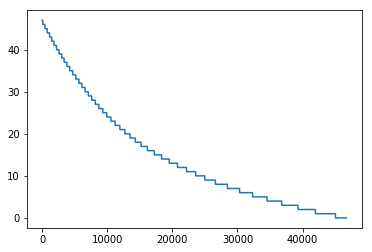

In [25]:
# request frequency distributions for all bottom 50k contents on day 1
plt.plot(x[:50000],y[-50000:])
print(min(y[-50000:]), max(y[-50000:]))

[18801.] [46121.]


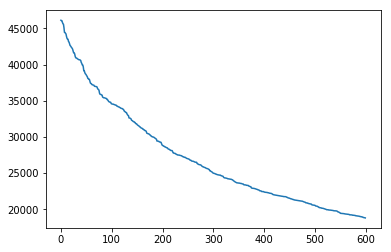

In [26]:
# Will a cache with size 1% have an easy time caching the best contents?
# Since 1% of 50k contents is 500, lets look at the popularities of contents 200-800
plt.plot(x[:600],y[200:800])
print(min(y[200:800]), max(y[200:800]))

In [14]:
# popularities of contents above are fairly similar, this demonstrates that caching will still be 
# a difficult problem eventhough the dataset skewed

In [27]:
borderline_ixs = list(df[450:550].index)

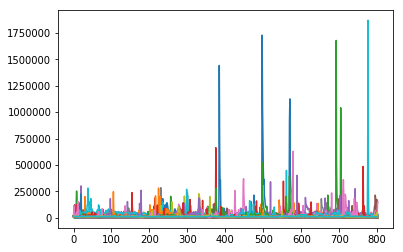

In [28]:
for ix in borderline_ixs:
    tempdf = pd.read_csv('wikipedia/web-traffic-time-series-forecasting/train_2.csv', skiprows=range(1,ix+1), nrows=1)
    tempdf.drop('Page', axis=1, inplace=True)
    plt.plot(tempdf.values.flatten())

In [82]:
# the borderline ixs are also inconsistent throughout the entire period (seen through different colored spikes)
# this shows that their popularity is dynamically changing, 
# a property which would make the caching problem more challenging